# Medical Insurance Price Prediction using Machine Learning

Here we will try to extract some insights from a dataset that contains details about the background of a person who is purchasing medical insurance along with what amount of premium is charged to those individuals

# DATA PREPROCESSING

In [27]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [50]:
#loading the dataset
df=pd.read_csv("/content/insurance.csv")

# EDA

In [51]:
# shape of the dataframe
df.shape


(1338, 7)

In [52]:
print(df.info())  # Data types & missing values
print(df.head())  # First 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [53]:
# display column names
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [54]:

# Statistical summary of numerical features
print("\nStatistical Summary of Numerical Features:\n", df.describe())

# Statistical summary of categorical features
print("\nStatistical Summary of Categorical Features:\n")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Statistical Summary of Numerical Features:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Statistical Summary of Categorical Features:


Column: sex
sex
male      676
female    662
Name: count, dtype: int64

Column: smoker
smoker
no     1064
yes     274
Name: count, dtype: int64

Column: region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


# DATA VISUALIZATION

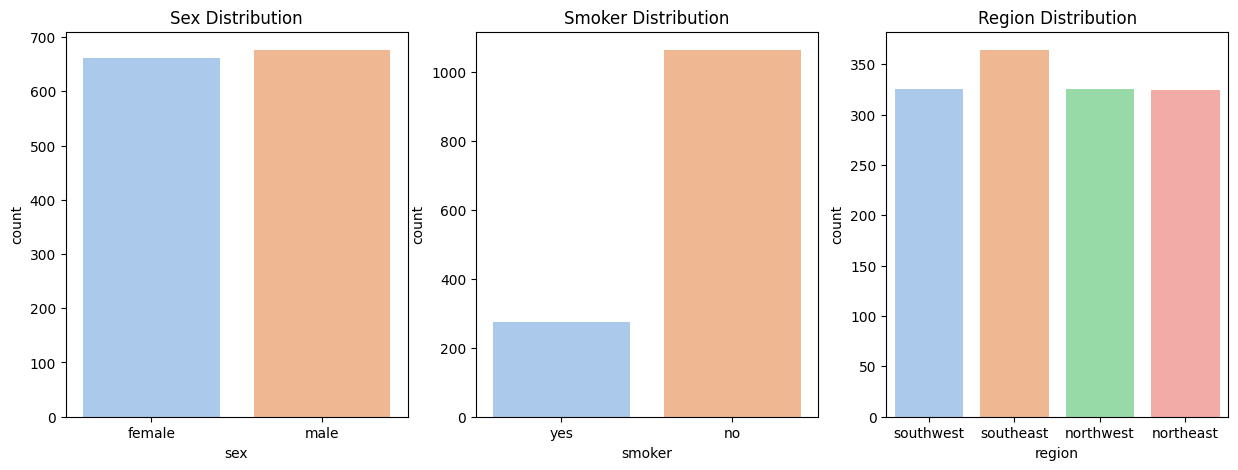

In [55]:
# Count plot for categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x="sex", data=df, ax=axes[0], palette="pastel")
sns.countplot(x="smoker", data=df, ax=axes[1], palette="pastel")
sns.countplot(x="region", data=df, ax=axes[2], palette="pastel")

axes[0].set_title("Sex Distribution")
axes[1].set_title("Smoker Distribution")
axes[2].set_title("Region Distribution")

plt.show()


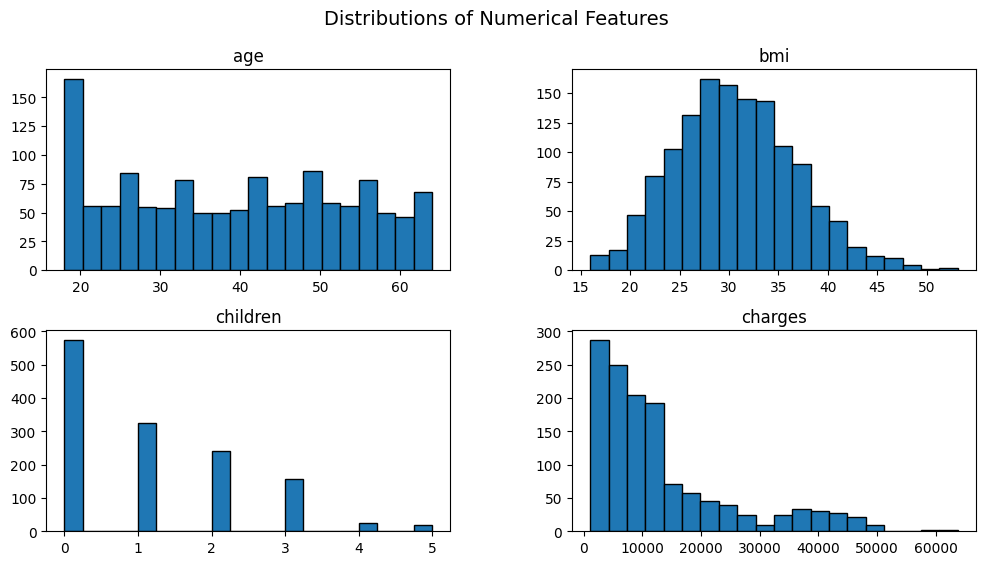

In [56]:
# Histogram of numerical features
df.hist(figsize=(12, 6), bins=20, edgecolor="black", grid=False)
plt.suptitle("Distributions of Numerical Features", fontsize=14)
plt.show()


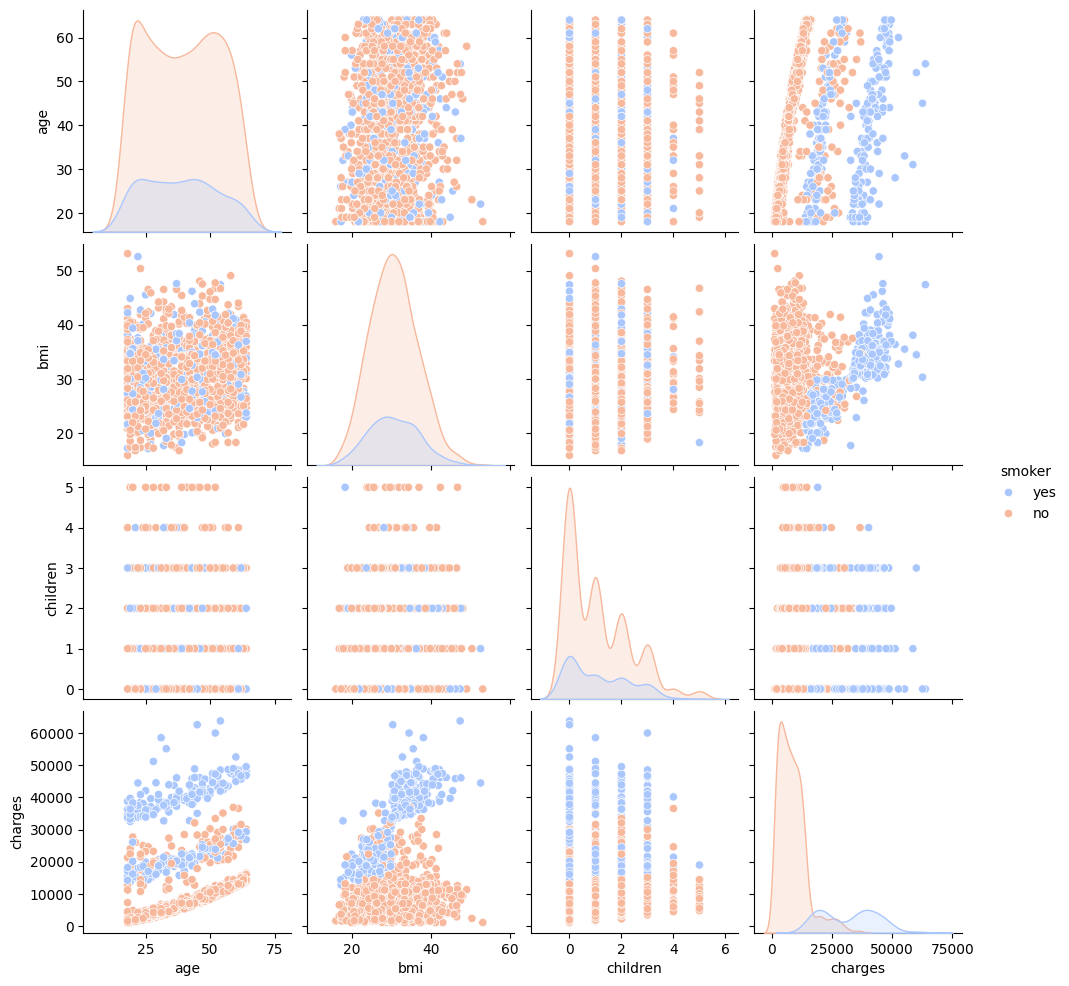

In [57]:
#relationships between the numerical features
sns.pairplot(df, hue="smoker", palette="coolwarm")
plt.show()


1.Smoking significantly increases insurance charges – smokers (blue points) have much higher costs than non-smokers, forming a separate cluster.

2.Age and charges show a positive correlation – older individuals tend to have higher insurance costs.

3.BMI and charges have a weak positive relationship – higher BMI slightly increases insurance charges, especially for smokers.

4.Number of children has little to no impact on charges – no clear trend is visible.

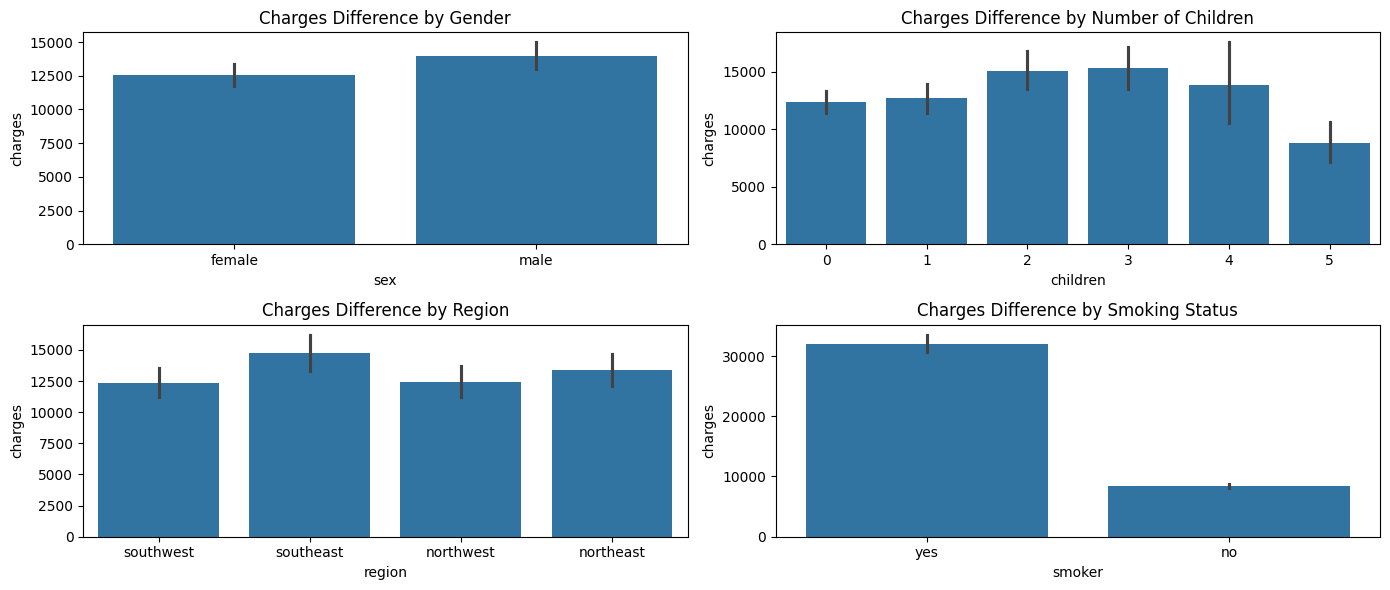

In [58]:
#difference in charges  for categorical features
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.barplot(x='sex', y='charges', data=df)
plt.title('Charges Difference by Gender')

plt.subplot(2, 2, 2)
sns.barplot(x='children', y='charges', data=df)
plt.title('Charges Difference by Number of Children')

plt.subplot(2, 2, 3)
sns.barplot(x='region', y='charges', data=df)
plt.title('Charges Difference by Region')

plt.subplot(2, 2, 4)
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Charges Difference by Smoking Status')

plt.tight_layout()
plt.show()


1.Smoking has the biggest impact on charges – smokers pay significantly more.The difference is huge, with smokers paying nearly 3x more than non-smokers.

2.Males have slightly higher average insurance charges than females.However, the difference is not very significant, meaning gender does not have a strong impact on charges.

3.Having more children does not strongly affect insurance costs.

4.Southeast region has the highest average charges.

# DATA WRANGLING

In [61]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display duplicate rows if any
if duplicate_count > 0:
    print("\nDuplicate Rows:")
    print(df[df.duplicated()])

Number of duplicate rows: 1

Duplicate Rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [62]:

# Drop duplicate rows
df = df.drop_duplicates()

# Verify if duplicates are removed
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicate_count}")


Number of duplicate rows after dropping: 0


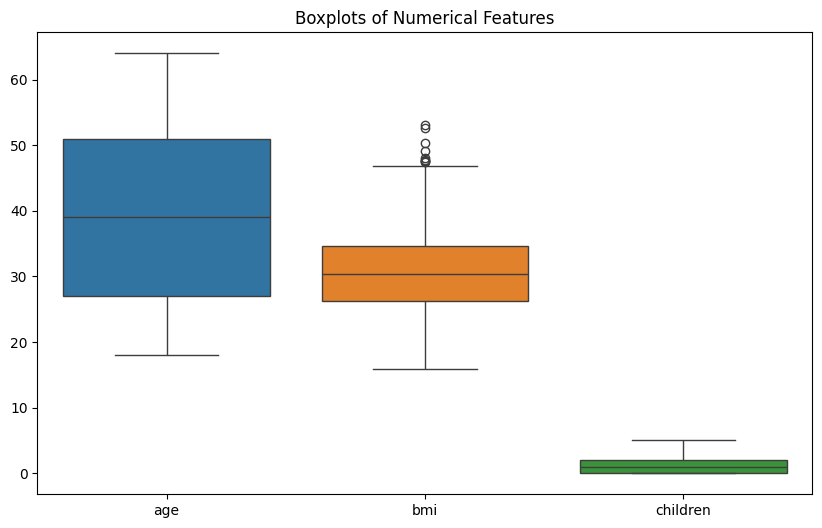

In [63]:
#checking outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'bmi', 'children']])
plt.title("Boxplots of Numerical Features")
plt.show()


In [64]:
#Handling outliers
# Calculate the IQR for 'bmi'
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier rows
outlier_rows = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# Calculate the median of 'bmi'
median_bmi = df['bmi'].median()

# Replace outliers with the median
df.loc[outlier_rows.index, 'bmi'] = median_bmi

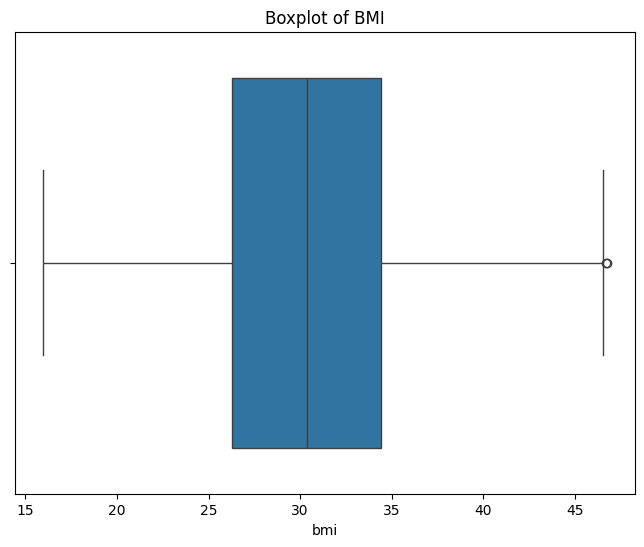

In [65]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()


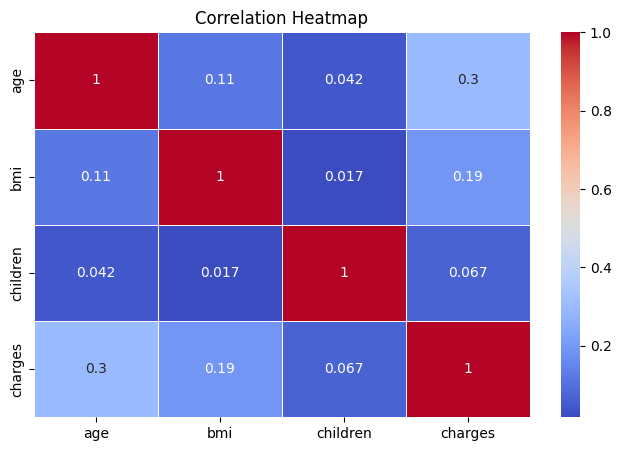

In [66]:
#correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [67]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding
df["sex"] = le.fit_transform(df["sex"])      # female -> 0, male -> 1
df["smoker"] = le.fit_transform(df["smoker"])  # no -> 0, yes -> 1

In [68]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)

# Reshape and encode the 'region' column
region_encoded = encoder.fit_transform(df[['region']])

# Convert the encoded data into a DataFrame with column names
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['region']))

# Concatenate the encoded columns back to the original DataFrame
df = pd.concat([df, region_df], axis=1)

# Drop the original 'region' column
df.drop(columns=['region'], inplace=True)



In [69]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19.0,0.0,27.900,0.0,1.0,16884.92400,0.0,0.0,1.0
1,18.0,1.0,33.770,1.0,0.0,1725.55230,0.0,1.0,0.0
2,28.0,1.0,33.000,3.0,0.0,4449.46200,0.0,1.0,0.0
3,33.0,1.0,22.705,0.0,0.0,21984.47061,1.0,0.0,0.0
4,32.0,1.0,28.880,0.0,0.0,3866.85520,1.0,0.0,0.0


In [71]:
# check if there is any Nan/missing values

print(df.isnull().values.any())
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing Values after imputation:\n", df.isnull().sum())


True

Missing Values after imputation:
 age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


# MODEL FITTING

In [72]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})



In [75]:
df1

,train acc,test acc,cvs
0,0.745545,0.758460,0.744495
1,0.755505,0.695178,0.744495
2,0.750328,0.740739,0.744495
3,0.755845,0.714400,0.744495
4,0.740635,0.781204,0.744495
5,0.752962,0.729047,0.744495
6,0.732362,0.798367,0.744495
7,0.745822,0.758316,0.744495
8,0.751974,0.731489,0.744495
9,0.737434,0.787625,0.744495



We have identified the best random_state number for this data set as 46 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.


In [79]:

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=46)

# Linear Regression
lrmodel = LinearRegression()
lrmodel.fit(xtrain, ytrain)
lr_train_acc = lrmodel.score(xtrain, ytrain)
lr_test_acc = lrmodel.score(xtest, ytest)

# SVR
svr_model = SVR()
svr_model.fit(xtrain, ytrain)
svr_train_acc = svr_model.score(xtrain, ytrain)
svr_test_acc = svr_model.score(xtest, ytest)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=46)
rf_model.fit(xtrain, ytrain)
rf_train_acc = rf_model.score(xtrain, ytrain)
rf_test_acc = rf_model.score(xtest, ytest)

# XGBoost Regressor
xgb_model = XGBRegressor(random_state=46)
xgb_model.fit(xtrain, ytrain)
xgb_train_acc = xgb_model.score(xtrain, ytrain)
xgb_test_acc = xgb_model.score(xtest, ytest)

print("Linear Regression Train Accuracy:", lr_train_acc)
print("Linear Regression Test Accuracy:", lr_test_acc)
print("SVR Train Accuracy:", svr_train_acc)
print("SVR Test Accuracy:", svr_test_acc)
print("Random Forest Train Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)
print("XGBoost Train Accuracy:", xgb_train_acc)
print("XGBoost Test Accuracy:", xgb_test_acc)


Linear Regression Train Accuracy: 0.7323623192426737
Linear Regression Test Accuracy: 0.7983671566451737
SVR Train Accuracy: -0.09731317405424655
SVR Test Accuracy: -0.10753749399484791
Random Forest Train Accuracy: 0.9744455925906602
Random Forest Test Accuracy: 0.8638538009173062
XGBoost Train Accuracy: 0.9948493838310242
XGBoost Test Accuracy: 0.8548275232315063


We can say that the random forest model is the best model as-

1.Test accuracy is the highest (0.8639).

2.Train accuracy is high but not maxed out, which suggests it fits the training data well without extreme overfitting.

3.XGBoost is close, but it slightly overfits more than Random Forest here.


Now we need to identify the important features for predicting charges

In [83]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)

# Print the feature importances
features


,Feature,Importance
4,smoker,0.601699
2,bmi,0.214648
0,age,0.139747
3,children,0.022046
1,sex,0.006855
6,region_southeast,0.006320
5,region_northwest,0.004588
7,region_southwest,0.004095


In [85]:
# Filter for important features (Importance > 0.01)
important_features = features[features['Importance'] > 0.01]
print(important_features)

    Feature  Importance
4    smoker    0.601699
2       bmi    0.214648
0       age    0.139747
3  children    0.022046


In [86]:

# Get the names of important features
important_feature_names = important_features['Feature'].tolist()

# Select important features from X
X_important = X[important_feature_names]

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(X_important, Y, test_size=0.2, random_state=46)

# Initialize and train RandomForestRegressor
rf_model = RandomForestRegressor(random_state=46)
rf_model.fit(xtrain, ytrain)

# Calculate training accuracy
rf_train_acc = rf_model.score(xtrain, ytrain)

# Calculate testing accuracy
rf_test_acc = rf_model.score(xtest, ytest)

# Calculate cross-validation score
rf_cvs = cross_val_score(rf_model, X_important, Y, cv=5).mean()

print("Random Forest Train Accuracy:", rf_train_acc)
print("Random Forest Test Accuracy:", rf_test_acc)
print("Random Forest Cross-Validation Score:", rf_cvs)


Random Forest Train Accuracy: 0.9728492041045423
Random Forest Test Accuracy: 0.8605125921141824
Random Forest Cross-Validation Score: 0.824993982291998


In [87]:

y_pred = rf_model.predict(xtest)

# Create a DataFrame for the comparison
comparison_df = pd.DataFrame({'Actual': ytest['charges'], 'Predicted': y_pred})

# Display the DataFrame
comparison_df


,Actual,Predicted
141,3490.54910,7238.775899
1066,8978.18510,9478.514846
467,12643.37780,12726.298195
557,3935.17990,5706.223722
166,4830.63000,10440.104591
...,...,...
976,7804.16050,8919.005972
917,35069.37452,20653.172465
494,17942.10600,17462.693421
1007,24915.22085,26933.976577
